In [10]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

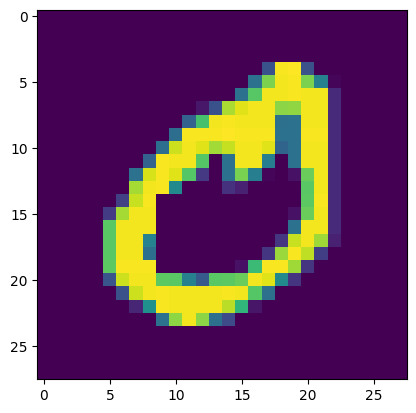

In [45]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape
test = x_train[4]
plt.imshow(test,cmap='gray')
x_train.max()
x_train.min()
X_train = x_train/255.0
X_test = x_test/255.0
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, 10)
y_test_scaled = utils.to_categorical(y_test, 10)
y_train.shape
img = X_train[21]
plt.imshow(img)

In [46]:
X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)
type(y_train)
X_train.shape

(60000, 28, 28, 1)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (3,3), activation="relu"),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(16, activation="relu"),
    Dense(16, activation='relu'),
    Dense(10, activation="softmax")  
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 16)        4624      
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          9280      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [17]:
model.compile(
    'adam', 
    loss ='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test,y_test)
)
metrics = pd.DataFrame(model.history.history)
metrics.head()

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0306 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0365 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0348 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.0325 - va

,loss,accuracy,val_loss,val_accuracy
0,0.034091,0.989733,0.031339,0.9897
1,0.025277,0.991950,0.040371,0.9876
2,0.021953,0.993300,0.030565,0.9904
3,0.018665,0.994017,0.036484,0.9886
4,0.016626,0.994800,0.036015,0.9882


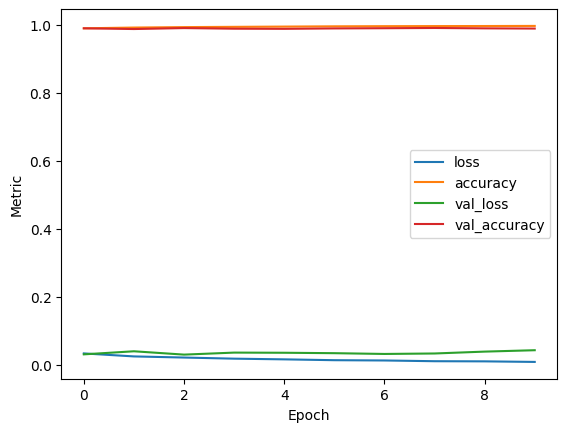

In [48]:
metrics.plot()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()

In [51]:
import numpy as np
pred = np.argmax(model.predict(X_test),axis=1)
pred[0:10]
y_test[0:10]
print(type(y_test))
print(type(pred))

313/313 [==============================] - 1s 3ms/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
y_test = y_test.ravel()
pred=pred.ravel()
print("Name : YUVARAJ.S\nRegister Number : 212222240119\n")
print(confusion_matrix(y_test,pred))

Name : YUVARAJ.S
Register Number : 212222240119

[[   0    0    0    0    0    0    0  980    0    0]
 [   0    0    0    0    0    1    0 1134    0    0]
 [   4    0    0    0    0   10    3 1015    0    0]
 [   0    0    0    0    0    0    0 1010    0    0]
 [   0    0    0    0    0    0    0  982    0    0]
 [   0    0    0    0    0    1    0  891    0    0]
 [   0    0    0    0    0    0    0  958    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    1  973    0    0]
 [   0    0    0    0    0    0    0 1009    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.08      0.00      0.00       892
           6       0.00      0.00      0.

c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.08      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.10      1.00      0.19      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.02     10000
weighted avg       0.02      0.10      0.02     10000



c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

1/1 [==============================] - 0s 25ms/step
Name : YUVARAJ.S
Register Number : 212222240119



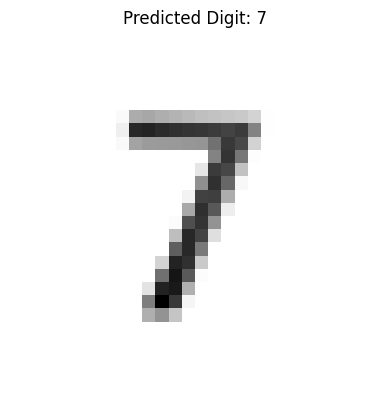

In [90]:
from PIL import Image
input_img_path = '7.jpg'
input_img = Image.open(input_img_path).convert('L') 
input_img = input_img.resize((28, 28))  
input_img = np.array(input_img)  
input_img = input_img.reshape(1, 28, 28, 1)  
input_img = input_img.astype('float32') / 255.0  
predicted_label = model.predict(input_img)
predicted_digit = np.argmax(predicted_label)

print("Name : YUVARAJ.S\nRegister Number : 212222240119\n")

plt.imshow(input_img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()
